# data processing

## numpy playing with images

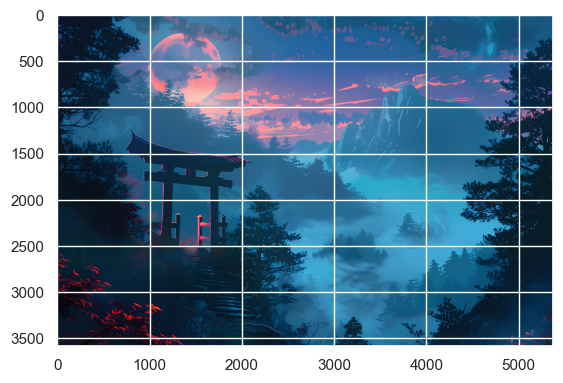

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

img = plt.imread(r'/Users/ansorisan/Pictures/Wallpapers/new/japan-background-digital-art (2).jpg')
plt.imshow(img)

42.279167434796186 84.13182130151866 117.60841317728263


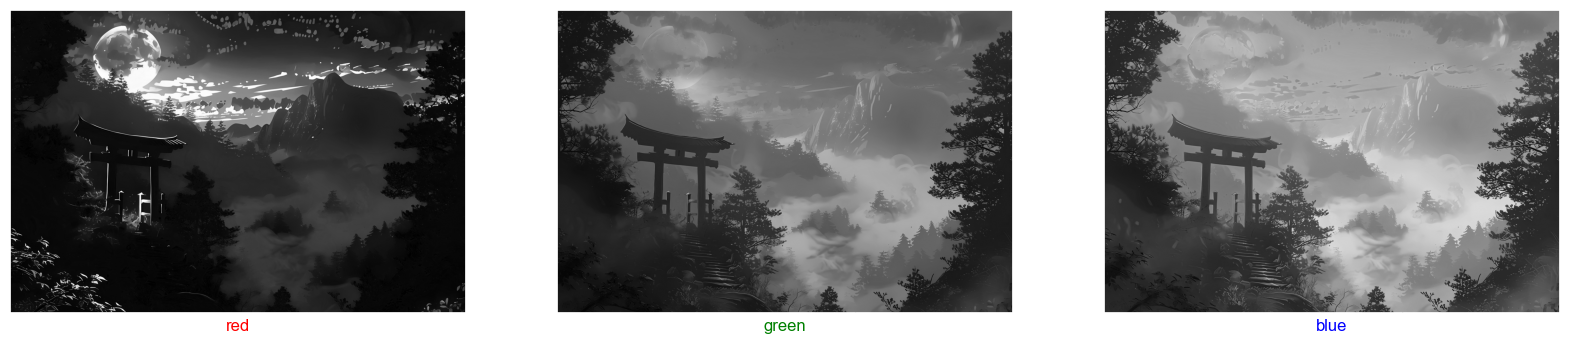

In [3]:
fig, ax = plt.subplots(1, 3)
ch = ['red', 'green', 'blue']
for i, axi in enumerate(ax.flat):
  axi.imshow(img[:, :, i], plt.cm.gray)
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(ch[i], color=ch[i].lower())
  fig.set_size_inches(20, 50)

print(img[:, :, 0].mean(), img[:, :, 1].mean(), img[:, :, 2].mean())

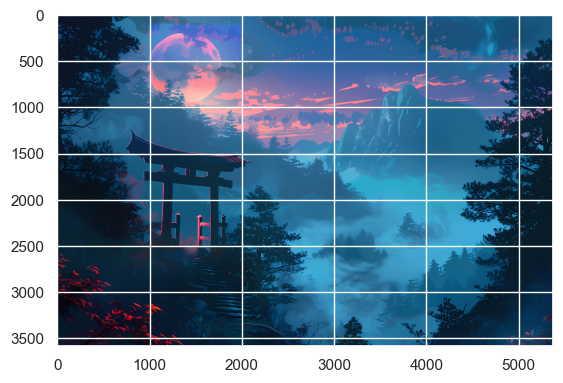

In [4]:
img1 = img.copy()
img1[100:500, 1000:2000, 2] = 200
plt.imshow(img1)

## knn

In [5]:
from sklearn.datasets import load_iris as li
import numpy as np
from scipy.stats import mode

iris = li()

x = iris.data
y = iris.target

def myTrainTestSplit(x, y, testSize):
  i = np.random.permutation(np.arange(x.shape[0]))
  ts = int(np.floor(testSize * x.shape[0]))
  testIdx = i[:ts]
  trainIdx = i[ts:]
  xTrain = x[trainIdx, :]
  yTrain = y[trainIdx]
  xTest = x[testIdx, :]
  yTest = y[testIdx]
  return xTrain, xTest, yTrain, yTest

xTrain, xTest, yTrain, yTest = myTrainTestSplit(x, y, 0.2)
d = np.sum((xTrain[:, np.newaxis, :] - xTest[np.newaxis, :, :])**2, axis=2)

nidx = np.argsort(d, axis=0)
nLabel = yTrain[nidx[:5, :]]

pred = mode(nLabel, axis=0, keepdims=False)
result = pred.mode.squeeze()

accuracy = np.mean(result == yTest)
accuracy


np.float64(1.0)

## structured array

In [6]:
x = np.array([('Contract', 30, '1982', 5000000), ('Full-Time', 60, '1856', 10000000), ('Freelance', 30, '1982', 5000000)],
             dtype=[('EmployeeType', 'U20'), ('Age', 'i8'), ('Birth', 'U10'), ('Salary', 'i8')])
x

array([('Contract', 30, '1982',  5000000),
       ('Full-Time', 60, '1856', 10000000),
       ('Freelance', 30, '1982',  5000000)],
      dtype=[('EmployeeType', '<U20'), ('Age', '<i8'), ('Birth', '<U10'), ('Salary', '<i8')])

# data manipulation

## pandas data frame

In [7]:
import pandas as pd
name = {'A': 'Alan', 'B': 'John','C': 'Cindy', 'D': 'Stacy', 'E': 'Diana'}
vaccinated = {'A': 'True', 'B': 'False', 'C': 'False', 'D': 'True', 'E': 'False'}
d = pd. DataFrame({'Names': name, 'Vaccined' :vaccinated})
d 

,Names,Vaccined
A,Alan,True
B,John,False
C,Cindy,False
D,Stacy,True
E,Diana,False


pandas missing val till group can be ref to py_fundamental

## covid-19 data

In [8]:
import datetime as dt

df = pd.read_csv(r'/Users/ansorisan/Desktop/machine learning/covid_19_till_19_May_2020.csv')

df.rename(columns={'Province/State': 'Province', 'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)
df.Date = pd.to_datetime(df['Date'])
df.head()

/var/folders/w5/b41cll9j5n9f_7g2p0qf9j1m0000gn/T/ipykernel_9563/291295162.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Date = pd.to_datetime(df['Date'])


,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [9]:
df.isnull().sum()

Province     22015
Country          0
Lat              0
Long             0
Date             0
Confirmed        0
Deaths           0
Recovered        0
dtype: int64

In [10]:
i = df['Province'].isnull()
df['Province'][i] = 'other'
df.head()

/var/folders/w5/b41cll9j5n9f_7g2p0qf9j1m0000gn/T/ipykernel_9563/4208494975.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Province'][i] = 'other'
/var/folders/w5/b41cll9j5n9f_7g2p0qf9j1m0000gn/T/ipykernel_9563/4208494975.py:2: Setti

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,other,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,other,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,other,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,other,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,other,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [11]:
df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum()

,Confirmed,Deaths,Recovered
Country,,,
Afghanistan,115615,3211,13641
Albania,34319,1408,20212
Algeria,183263,19089,76184
Andorra,36237,1862,16176
Angola,1452,106,383
...,...,...,...
West Bank and Gaza,17029,95,6333
Western Sahara,256,0,144
Yemen,1190,190,30


In [12]:
df[df['Country'] == df.Country.unique()[120]]

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
183,other,Poland,51.9194,19.1451,2020-01-22,0,0,0
448,other,Poland,51.9194,19.1451,2020-01-23,0,0,0
713,other,Poland,51.9194,19.1451,2020-01-24,0,0,0
978,other,Poland,51.9194,19.1451,2020-01-25,0,0,0
1243,other,Poland,51.9194,19.1451,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
30393,other,Poland,51.9194,19.1451,2020-05-15,18016,907,6918
30658,other,Poland,51.9194,19.1451,2020-05-16,18257,915,7175
30923,other,Poland,51.9194,19.1451,2020-05-17,18529,925,7451
31188,other,Poland,51.9194,19.1451,2020-05-18,18885,936,7628


# data visualization

## geographic map

In [13]:
import folium

df.head()

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,other,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,other,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,other,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,other,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,other,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [14]:
df1 = df[df['Date'] == df.Date.max()]
df1

,Province,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
31270,other,Afghanistan,33.000000,65.000000,2020-05-19,7653,178,850
31271,other,Albania,41.153300,20.168300,2020-05-19,949,31,742
31272,other,Algeria,28.033900,1.659600,2020-05-19,7377,561,3746
31273,other,Andorra,42.506300,1.521800,2020-05-19,761,51,628
31274,other,Angola,-11.202700,17.873900,2020-05-19,52,3,17
...,...,...,...,...,...,...,...,...
31530,other,Sao Tome and Principe,0.186360,6.613081,2020-05-19,251,8,4
31531,other,Yemen,15.552727,48.516388,2020-05-19,167,28,5
31532,other,Comoros,-11.645500,43.333300,2020-05-19,11,1,3
31533,other,Tajikistan,38.861034,71.276093,2020-05-19,1936,41,641


In [15]:
m = folium.Map(location=[20, 0], zoom_start=2, tiles="OpenStreetMap" )

for i in range(df1.shape[0]):
  r = df1.iloc[i]['Confirmed']
  folium.Circle(location=[df1.iloc[i]['Lat'], df1.iloc[i]['Long']],
                     radius=int(r),
                     popup=('Country: ' + str(df1.iloc[i]['Country']) + '<br>' +
                            'Confirmed: ' + str(df1.iloc[i]['Confirmed']) + '<br>' +
                            'Deaths: ' + str(df1.iloc[i]['Deaths']) + '<br>' +
                            'Recovered: ' + str(df1.iloc[i]['Recovered'])),
                     color='crimson',
                     fill=True,
                     fill_opacity=0.6).add_to(m)
m

,x,y,z
0,-1.147618,-0.197696,6.957424
1,-1.046576,-2.561295,0.268306
2,-0.518183,-2.790623,9.503453
3,1.638789,-2.691206,12.310239
4,0.025020,-4.623595,-3.779800
...,...,...,...
995,-1.933864,0.427950,1.694732
996,-0.086308,-3.184394,7.894408
997,0.050107,1.378281,3.539003
998,-0.246092,0.071004,6.298535


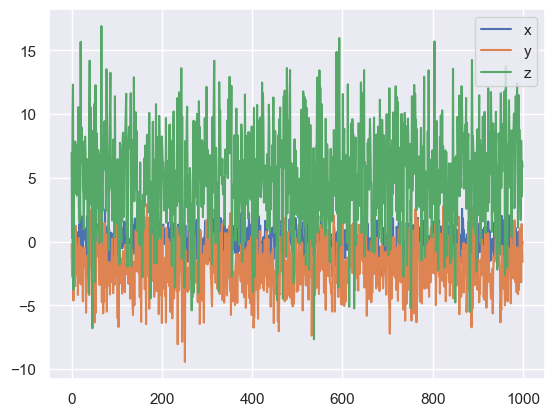

In [ ]:
df = pd.DataFrame({'x': np.random.normal(0, 1, 1000), 'y': np.random.normal(-2, 2, 1000), 'z': np.random.normal(5, 4, 1000)})
df.plot()

<Axes: ylabel='Frequency'>

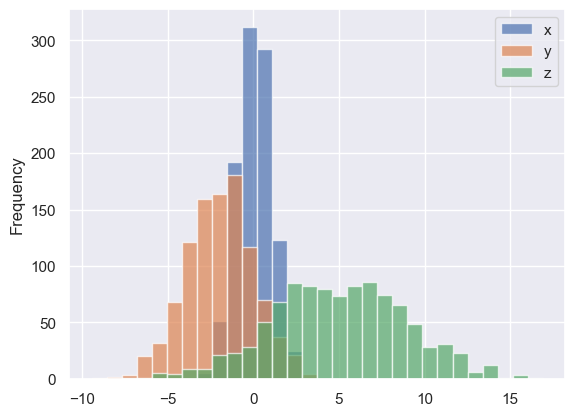

In [24]:
df.plot.hist(alpha=0.7, bins=30)

In [ ]:
dfplus = df.abs()
dfplus.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.1f%%')